In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_excel("MarginAnalysis.xlsx", sheet_name="Final Analysis")
df = df.iloc[:, 0:5]

df

,Pool / Client,Direct Labor Cost,June & July Rev,Margin ($),Margin (%)
0,Basking Ridge Country Club,47309.290397,75000,27690.709603,0.369209
1,Bedens Brook,65209.337575,81750,16540.662425,0.202332
2,Bernardsville,68928.494872,113750,44821.505128,0.394035
3,Cedar Hill Country Club,30323.483297,42250,11926.516703,0.282284
4,Cedarbrook at Branchburg,7353.691306,21000,13646.308694,0.649824
5,Cherry Valley Country Club,60468.718213,67500,7031.281787,0.104167
6,City Homes at Essex Park,6716.756909,21250,14533.243091,0.683917
7,Claridge House #1,20101.475562,39250,19148.524438,0.487860
8,Colonia Country club,15706.463614,35900,20193.536386,0.562494
9,Essex Fells Country Club,55593.394699,77000,21406.605301,0.278008


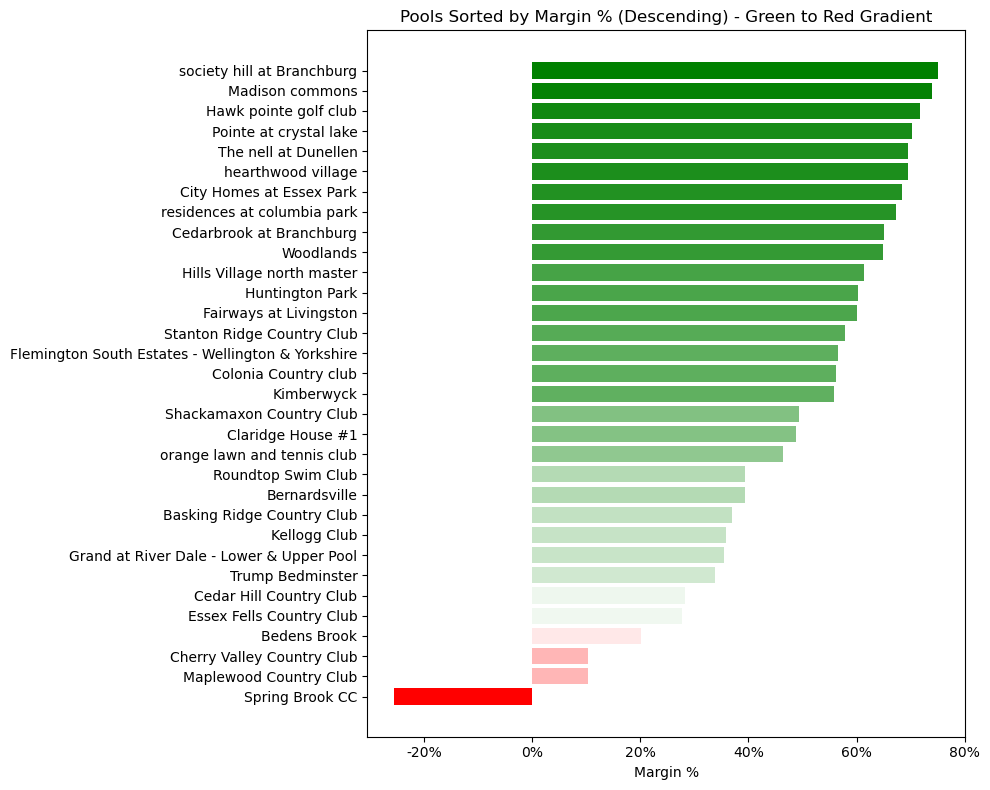

In [25]:
# Sort by Margin % descending
df_sorted = df.sort_values(by="Margin (%)", ascending=False)

# Normalize values for colormap
norm = plt.Normalize(df_sorted["Margin (%)"].min(), df_sorted["Margin (%)"].max())

# Green → White → Red colormap
cmap = mcolors.LinearSegmentedColormap.from_list("green_white_red", ["red", "white", "green"])

# Map colors to margins
colors = cmap(norm(df_sorted["Margin (%)"]))

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(df_sorted["Pool / Client"], df_sorted["Margin (%)"], color=colors)
plt.xlabel("Margin %")
plt.title("Pools Sorted by Margin % (Descending) - Green to Red Gradient")
plt.gca().invert_yaxis()

# Format x-axis as percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.tight_layout()
plt.show()


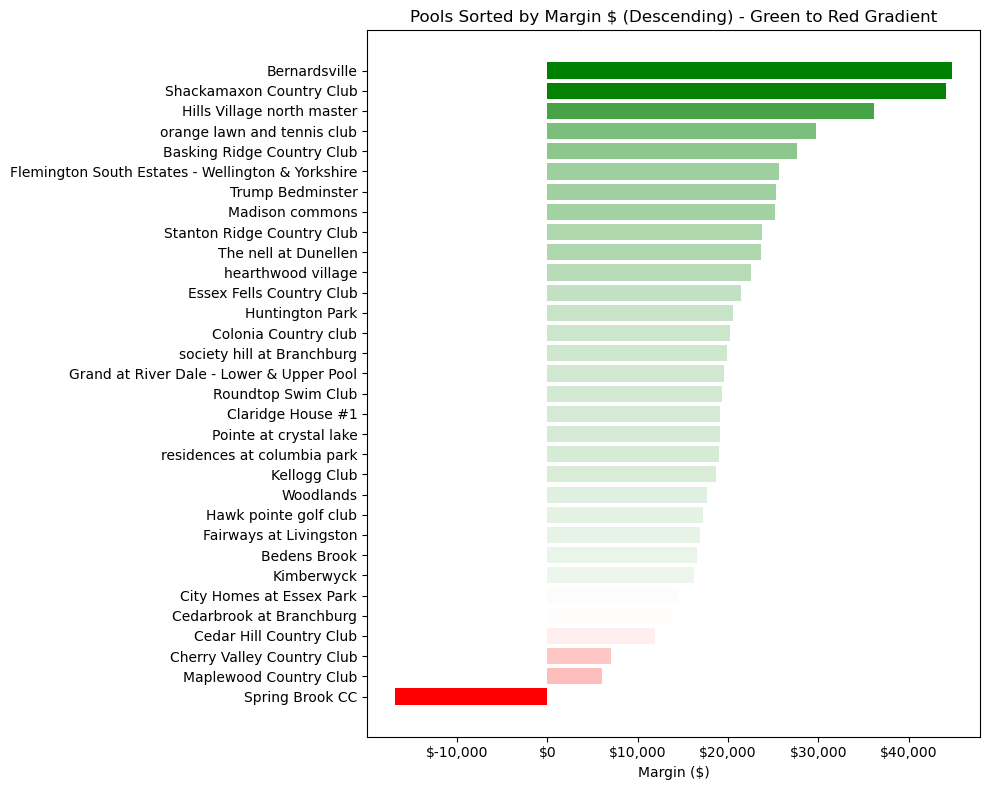

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --- Sort by Margin $ descending ---
df_sorted_margin_dollar = df.sort_values(by="Margin ($)", ascending=False)

# --- Normalize for colormap ---
norm = plt.Normalize(df_sorted_margin_dollar["Margin ($)"].min(),
                     df_sorted_margin_dollar["Margin ($)"].max())

# Green → White → Red colormap
cmap = mcolors.LinearSegmentedColormap.from_list(
    "green_white_red", ["red", "white", "green"]
)
colors_margin_dollar = cmap(norm(df_sorted_margin_dollar["Margin ($)"]))

# --- Plot ---
plt.figure(figsize=(10, 8))
plt.barh(
    df_sorted_margin_dollar["Pool / Client"],
    df_sorted_margin_dollar["Margin ($)"],
    color=colors_margin_dollar
)
plt.xlabel("Margin ($)")
plt.title("Pools Sorted by Margin $ (Descending) - Green to Red Gradient")
plt.gca().invert_yaxis()

# Format x-axis as currency
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()


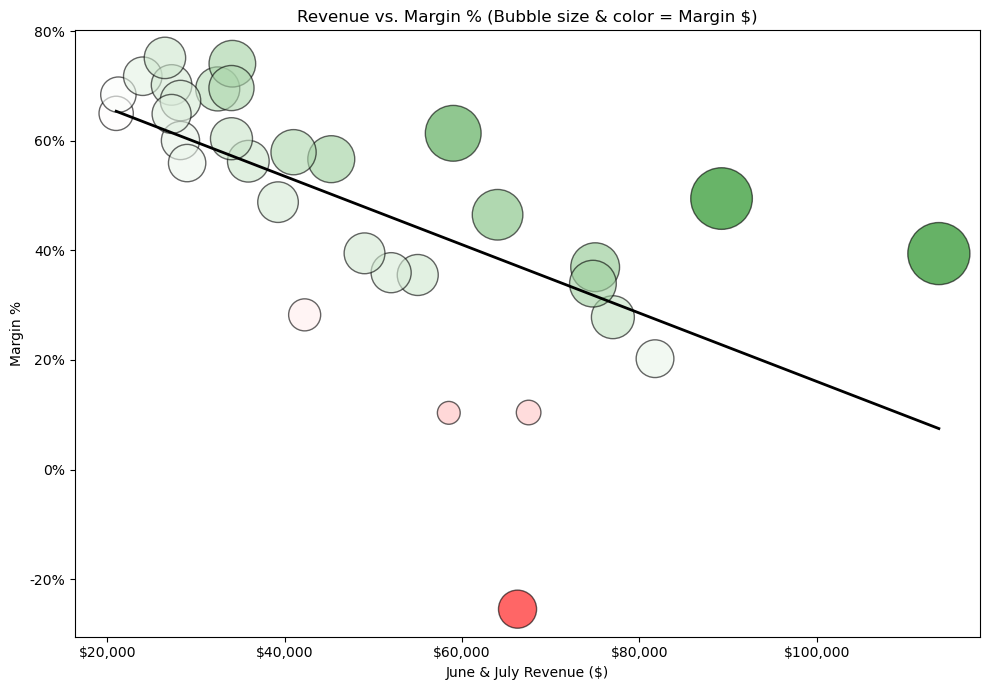

In [29]:
# Bubble size = absolute margin ($), scaled
sizes = (df["Margin ($)"].abs() / df["Margin ($)"].abs().max()) * 2000

# Bubble color = red → white → green by margin ($)
norm = plt.Normalize(df["Margin ($)"].min(), df["Margin ($)"].max())
cmap = mcolors.LinearSegmentedColormap.from_list("red_white_green", ["red", "white", "green"])
colors = cmap(norm(df["Margin ($)"]))

# ---- Plot ----
x = df["June & July Rev"]
y = df["Margin (%)"]

plt.figure(figsize=(10, 7))
plt.scatter(x, y, s=sizes, c=colors, edgecolors="k", alpha=0.6, marker="o")

# Trendline (black)
coeffs = np.polyfit(x, y, 1)
trend_x = np.linspace(x.min(), x.max(), 100)
trend_y = coeffs[0] * trend_x + coeffs[1]
plt.plot(trend_x, trend_y, color='black', linewidth=2)

# Formatting
plt.title("Revenue vs. Margin % (Bubble size & color = Margin $)")
plt.xlabel("June & July Revenue ($)")
plt.ylabel("Margin %")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{v:.0%}"))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"${v:,.0f}"))
plt.tight_layout()
plt.show()


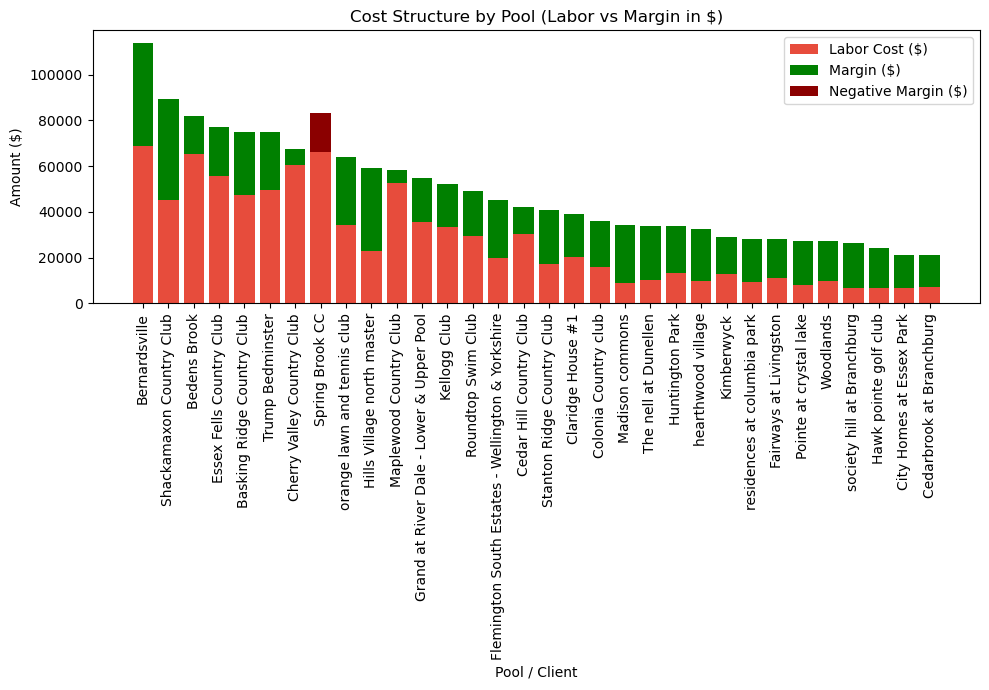

In [41]:
import matplotlib.pyplot as plt

# Sort by Revenue (descending) for presentation order
df_sorted_rev = df.sort_values(by="June & July Rev", ascending=False)
profit_vals = df_sorted_rev["Margin ($)"]
labor_vals = df_sorted_rev["Direct Labor Cost"]

plt.figure(figsize=(10, 7))

# Labor cost bars (slightly darker red)
plt.bar(
    df_sorted_rev["Pool / Client"],
    labor_vals,
    label="Labor Cost ($)",
    color="#e74c3c"
)

# Positive margin in green stacked on top of labor
positive_profit = profit_vals.clip(lower=0)
plt.bar(
    df_sorted_rev["Pool / Client"],
    positive_profit,
    bottom=labor_vals,
    label="Margin ($)",
    color="green"
)

# Negative margin in dark red, plotted downward from labor
negative_profit = profit_vals.clip(upper=0)
plt.bar(
    df_sorted_rev["Pool / Client"],
    negative_profit,
    bottom=labor_vals,
    label="Negative Margin ($)",
    color="darkred"
)

# Labels & formatting
plt.xlabel("Pool / Client")
plt.ylabel("Amount ($)")
plt.title("Cost Structure by Pool (Labor vs Margin in $)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


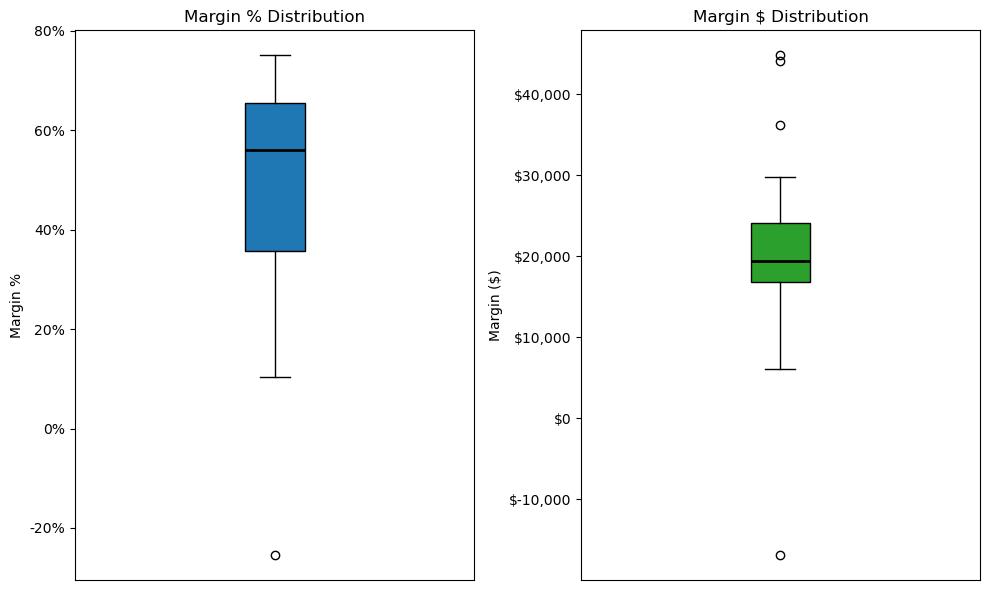

In [43]:

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Margin %
axes[0].boxplot(
    df["Margin (%)"],
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor="#1f77b4", color="black"),   # darker blue
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black", linewidth=2),
    showmeans=False
)
axes[0].set_title("Margin % Distribution")
axes[0].set_ylabel("Margin %")
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{v:.0%}"))
axes[0].set_xticks([])  # remove the "1" tick

# Margin $
axes[1].boxplot(
    df["Margin ($)"],
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor="#2ca02c", color="black"),   # darker green
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black", linewidth=2),
    showmeans=False
)
axes[1].set_title("Margin $ Distribution")
axes[1].set_ylabel("Margin ($)")
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"${v:,.0f}"))
axes[1].set_xticks([])  # remove the "1" tick

plt.tight_layout()
plt.show()



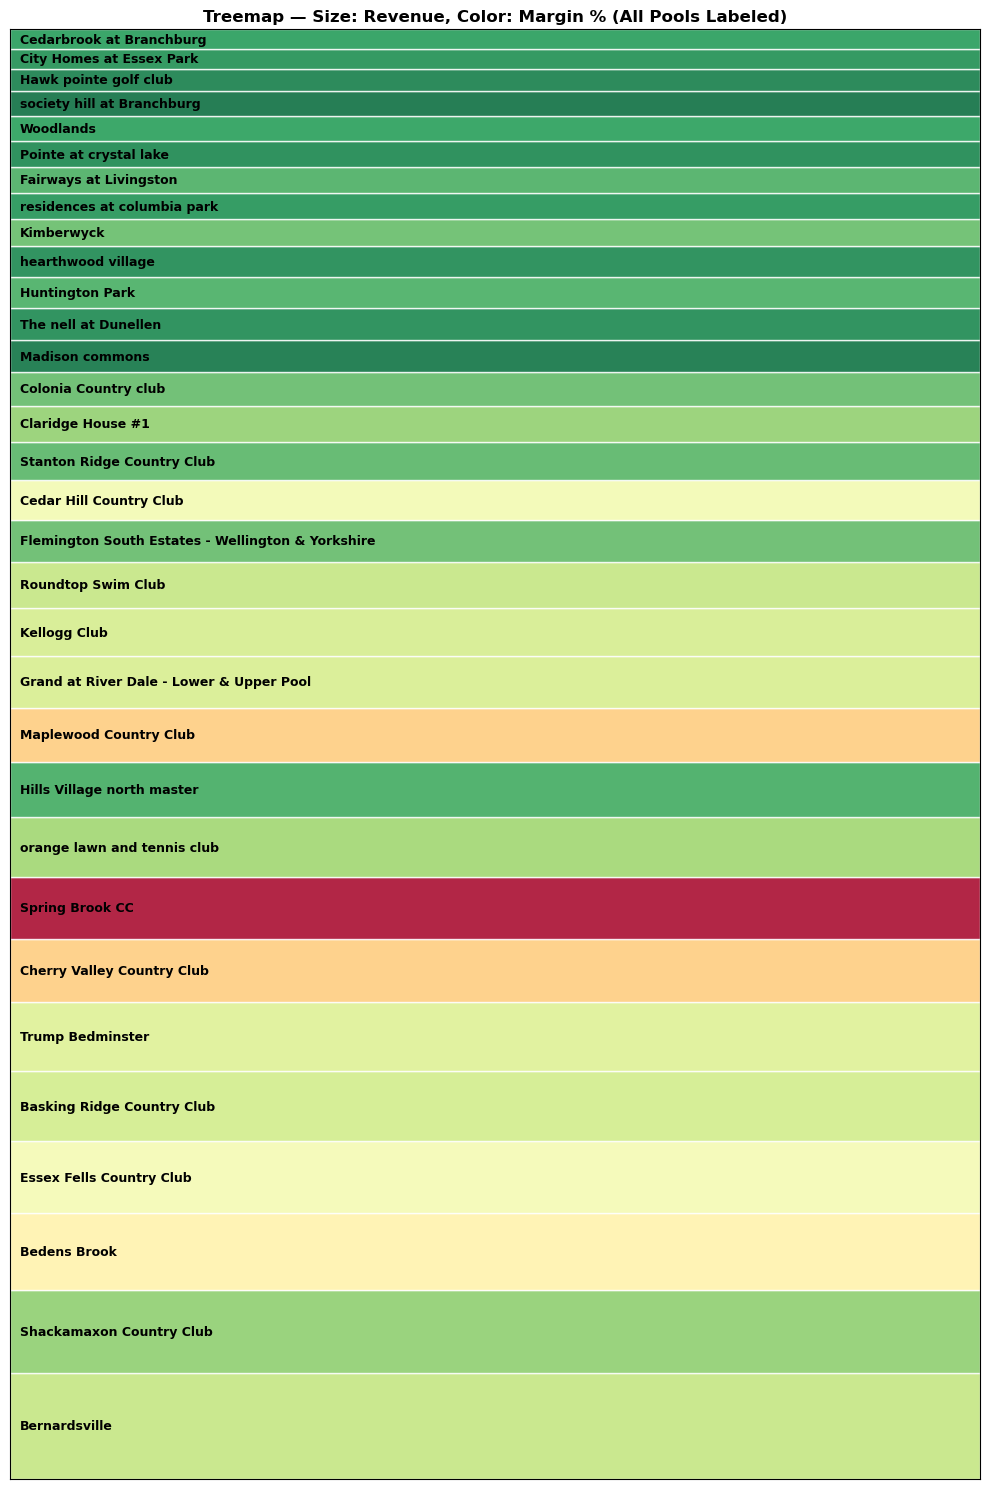

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# assumes df has columns: "Pool / Client", "June & July Rev", "Margin (%)"

# --- Prep ---
treemap_df = df.sort_values("June & July Rev", ascending=False).copy()
sizes  = treemap_df["June & July Rev"].values
labels = treemap_df["Pool / Client"].values

# continuous color mapping by Margin %
norm = plt.Normalize(df["Margin (%)"].min(), df["Margin (%)"].max())
cmap = plt.cm.RdYlGn
colors = cmap(norm(treemap_df["Margin (%)"].values))

# --- Draw (custom slice-and-dice treemap; taller so labels fit) ---
fig, ax = plt.subplots(figsize=(10, 15))

def draw_treemap(ax, sizes, labels, colors):
    total = np.sum(sizes)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    y0 = 0.0
    for s, lbl, col in zip(sizes, labels, colors):
        h = float(s) / float(total) if total > 0 else 0
        ax.add_patch(plt.Rectangle((0, y0), 1, h, facecolor=col, alpha=0.85, edgecolor="white"))
        # always label; bigger + bold for readability
        ax.text(0.01, y0 + h/2, lbl, va="center", ha="left",
                fontsize=9, fontweight="bold", color="black")
        y0 += h
    ax.set_xticks([]); ax.set_yticks([])

draw_treemap(ax, sizes, labels, colors)
ax.set_title("Treemap — Size: Revenue, Color: Margin % (All Pools Labeled)", fontweight="bold")
plt.tight_layout()
plt.show()
